# WALSOFT DATA ANALYST 

GOAL: central question
“Using the BI program dataset, how can Walsoft strategically improve :
* student success
* optimize resources
* increase the effectiveness of its training program?”

### Set up necessary tools and import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\PROJECT_GIT\BI-intro-to-data-cleaning-eda\data\dataset.csv", encoding='latin1')
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


### Data cleaning

Checking for null values

In [3]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

Formating 'gender' column to only include  MALE / FEMALE

In [4]:
print('before: ')
print(df['gender'].unique())
df['gender'] = df['gender'].apply(lambda x: 'MALE' if x.lower().startswith('m') else 'FEMALE')
print('after: ')
print(df['gender'].unique())

before: 
['Female' 'M' 'Male' 'F' 'female' 'male']
after: 
['FEMALE' 'MALE']


Formating 'country' column

In [5]:
# make countries' name consistence
print(df['country'].unique())
df['country'] = df['country'].replace({
    'norway': 'Norway',
    'Norge': 'Norway',
    'Rsa': 'South Africa',
    'UK': 'United Kingdom',
    'Somali': 'Somalia'
})
print(df['country'].unique())

['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Norge' 'norway' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']
['Norway' 'Kenya' 'Uganda' 'South Africa' 'Denmark' 'Netherlands' 'Italy'
 'Spain' 'United Kingdom' 'Somalia' 'Nigeria' 'Germany' 'France']


Formating residence column

In [6]:
# unify to BI Residence
print(df['residence'].unique())
df['residence'] = df['residence'].apply(lambda x: 'BI residence' if x.startswith('BI') else x)
print(df['residence'].unique())

['Private' 'Sognsvann' 'BI Residence' 'BI-Residence' 'BIResidence'
 'BI_Residence']
['Private' 'Sognsvann' 'BI residence']


Formating prevEducation column

In [7]:
#Education level typos and casing issues
# e.g. Barrrchelors → Bachelor, DIPLOMA, Diplomaaa → Diploma
print(df['prevEducation'].unique())
def clean_education(x):
    y = x.strip().lower()
    if y.startswith('ba'):
        return 'Bachelor'
    elif y. startswith('dip'):
        return 'Diploma'
    elif y.startswith('high'):
        return 'High School'
    else:
        return x
df['prevEducation'] = df['prevEducation'].apply(clean_education)
print(df['prevEducation'].unique())

['Masters' 'Diploma' 'HighSchool' 'High School' 'Bachelors' 'Barrrchelors'
 'diploma' 'DIPLOMA' 'Diplomaaa' 'Doctorate']
['Masters' 'Diploma' 'High School' 'Bachelor' 'Doctorate']


Fill null values with mean for numerical columns

In [8]:
# Missing scores in Python subject
# Fill NaN values using column mean or suitable imputation strategy
df['Python'] = df['Python'].fillna(df['Python'].mean())


In [9]:
df['DB'] = df['DB'].astype('float')
df.dtypes

fNAME             object
lNAME             object
Age                int64
gender            object
country           object
residence         object
entryEXAM          int64
prevEducation     object
studyHOURS         int64
Python           float64
DB               float64
dtype: object

### Explore and Analyse

In [10]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.206208,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


Presenting histograms for each field

In [11]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(include=['int64', 'float64']).columns
cat_col = cat_col.drop(['fNAME', 'lNAME'])  # remove name columns
print("Categorical columns:", cat_col)
print("Numerical columns:", num_col)

Categorical columns: Index(['gender', 'country', 'residence', 'prevEducation'], dtype='object')
Numerical columns: Index(['Age', 'entryEXAM', 'studyHOURS', 'Python', 'DB'], dtype='object')


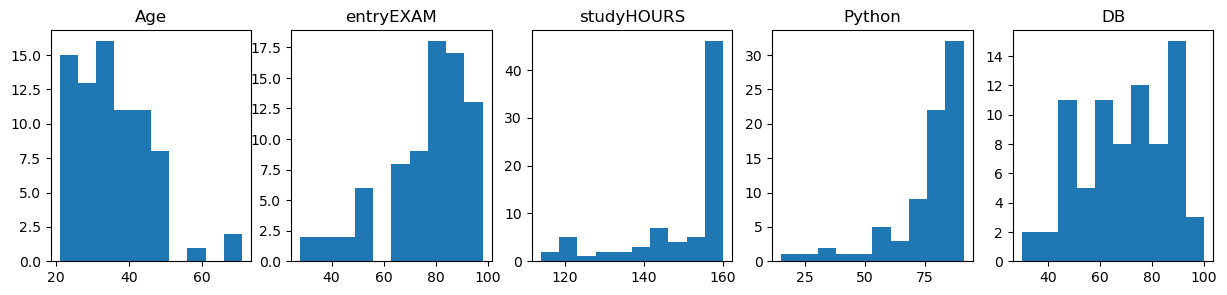

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,3))

axis = 0
for col in num_col:
    ax[axis].hist(df[col])
    ax[axis].set_title(col)
    axis += 1


Key takeaway:
* Age: The student body shows significant variance but is heavily concentrated in the 20–40 age range, suggesting the program appeals to both recent graduates and young professionals.

* Entry Exam (entryEXAM): Admissions performance is excellent, with the distribution heavily skewed towards the upper end. Most students score 80 or above, indicating a high-quality baseline of incoming knowledge.

* Study Hours (studyHOURS): Students demonstrate strong commitment. The data is highly concentrated at 150 hours and above, highlighting a dedicated and hardworking cohort.

* Final Scores (Python and DB): There is a noticeable performance gap:
Python scores are strongly skewed high, with many students excelling.
Database (DB) scores are more evenly distributed across the middle and upper ranges, suggesting students achieve better results in Python than in Database. This contrast is an area for further investigation regarding curriculum optimization.

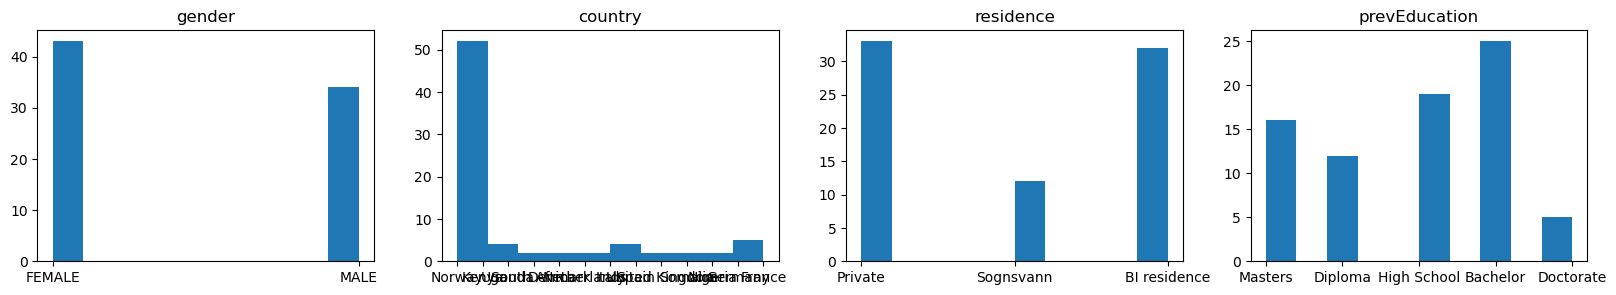

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

axis = 0
for col in cat_col:
    ax[axis].hist(df[col])
    ax[axis].set_title(col)
    axis += 1


A quick glance of where students come from, dominated by students from Norway. Previous education's background quite diversed suggests this program open for many level

Explore the correlaton between some measurements like entrance Exam, study hours and final result of python , Database course

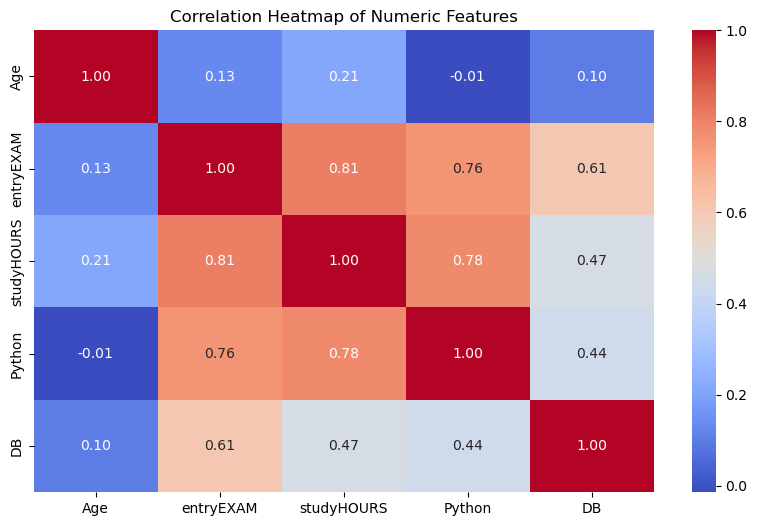

In [14]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



- **Age** shows almost no correlation with performance in Python (-0.01) and Database (0.10).  
  → Student age does not significantly affect outcomes.

- **Entry Exam** is strongly correlated with study hours (0.81), Python (0.76), and moderately with Database (0.61).  
  → Higher entry scores tend to predict stronger commitment and better results.

- **Study Hours** are highly correlated with Python (0.78) and moderately with Database (0.47).  
  → Consistent effort (time spent studying) directly contributes to performance, especially in Python.

- **Python and Database** scores are moderately correlated (0.44).  
  → Students strong in Python often perform reasonably well in Database, but the relationship is not very strong.

As study hours and Python scores are highly skewed, we will use regression plot to visualize the relationship between these variables.

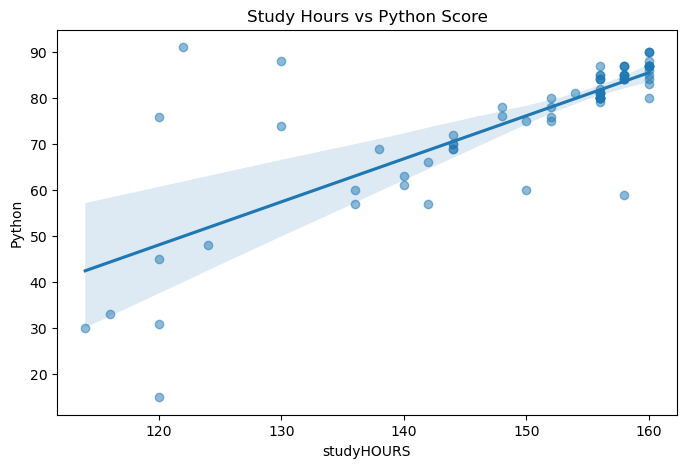

In [15]:
plt.figure(figsize=(8,5))
sns.regplot(x='studyHOURS', y='Python', data=df, scatter_kws={'alpha':0.5})
plt.title("Study Hours vs Python Score")
plt.show()


Though there's outliers:
High Effort, Low Score: Points below the regression line (high studyHOURS, low score) indicate students who need targeted intervention on learning methodology, as high effort isn't translating to success.

Low Effort, High Score: Points above the line (low studyHOURS, high score) suggest students with strong prior knowledge or inherent aptitude, who could be candidates for advanced, fast-paced projects.

#### There is a strong, clear positive linear relationship between study hours and Python scores. This confirms that increased effort (studyHOURS) directly correlates with higher academic achievement in the Python module.

Predictor: studyHOURS is an effective predictor of success. Walsoft should continue to emphasize and encourage on student effort.

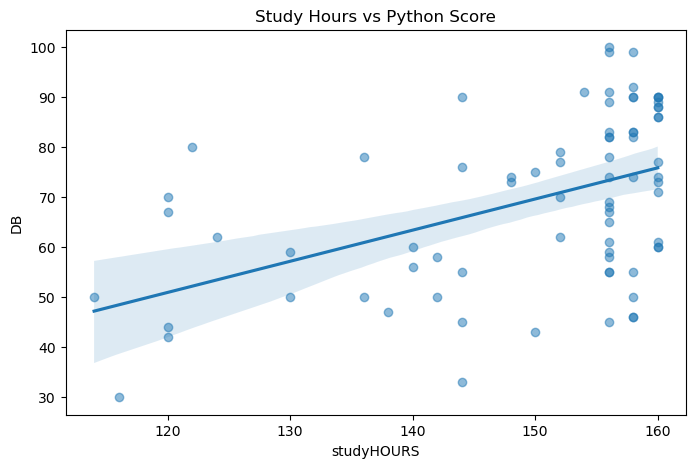

In [16]:

plt.figure(figsize=(8,5))
sns.regplot(x='studyHOURS', y='DB', data=df, scatter_kws={'alpha':0.5})
plt.title("Study Hours vs Python Score")
plt.show()

But for Database course's case, many study hours does not mean higher score

From the heatmap, we can see final scores of Python and DB has a relatively strong link with the entrance's score, hence we will put 2 graph show these connection to get a clearer viewpoint

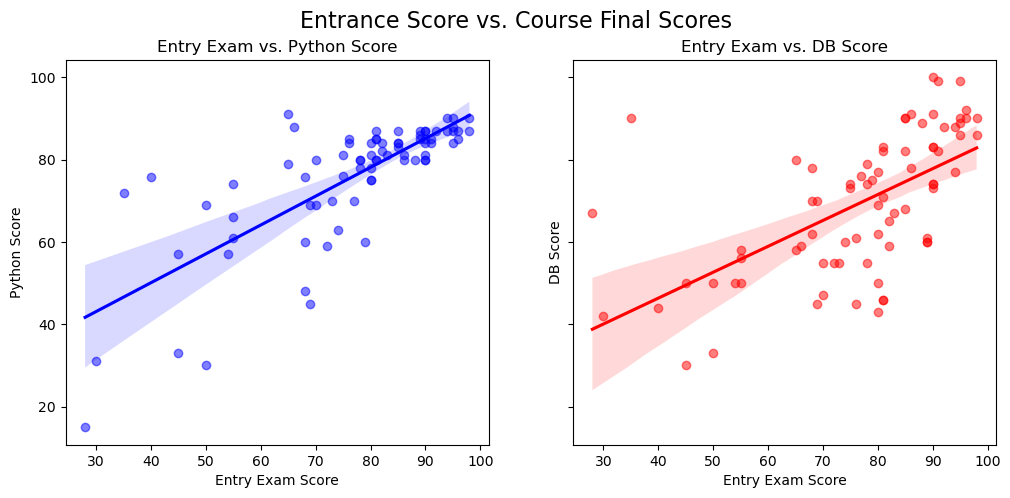

In [17]:
fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 5),
    sharex=True,
    sharey=True
)
fig.suptitle("Entrance Score vs. Course Final Scores", fontsize=16)

# 2. Plot 1: entryEXAM vs Python Score
sns.regplot(
    x='entryEXAM', y='Python', data=df, ax=axes[0], 
    scatter_kws={'alpha': 0.5, 'color': 'blue'},
    line_kws={'color': 'blue'}
)
axes[0].set_title("Entry Exam vs. Python Score")
axes[0].set_ylabel("Python Score")
axes[0].set_xlabel("Entry Exam Score")

# 3. Plot 2: entryEXAM vs DB Score
sns.regplot(
    x='entryEXAM', y='DB', data=df, ax=axes[1],
    scatter_kws={'alpha': 0.5, 'color': 'red'},
    line_kws={'color': 'red'}
)
axes[1].set_title("Entry Exam vs. DB Score")
axes[1].set_ylabel("DB Score")
axes[1].set_xlabel("Entry Exam Score")

plt.show()

Strong General Correlation: Both Python and DB show a strong, positive linear relationship with the Entry Exam score, validating the exam as a key indicator of academic potential.

Database (DB - Red): The data points are more scattered, and the confidence interval is noticeably wider. The Entry Exam is a less consistent predictor for DB performance.

Look into poor performance student and find possible cause or solution to improve their learning

In [18]:
low_score_student_python = df[(df['Python'] < 50)]
low_score_student_db = df[df['DB']< 50]
low_score_student_both_subject = df[(df['Python'] < 50) & (df['DB'] < 50)]

print(f"Number of students with score of either subject less than 50: {len(low_score_student_python) + len(low_score_student_db) - len(low_score_student_both_subject)}\n")


Number of students with score of either subject less than 50: 14



In [19]:
print(f"Number of students with score of both subjects less than 50: {len(low_score_student_both_subject)}\n")
print(f"Students with low scores in both subjects:\n{low_score_student_both_subject[['fNAME','lNAME','Python','DB', 'entryEXAM']]}")


Number of students with score of both subjects less than 50: 2

Students with low scores in both subjects:
    fNAME      lNAME  Python    DB  entryEXAM
20   Prof  Birkeland    33.0  30.0         45
32  Perry    Rønning    31.0  42.0         30


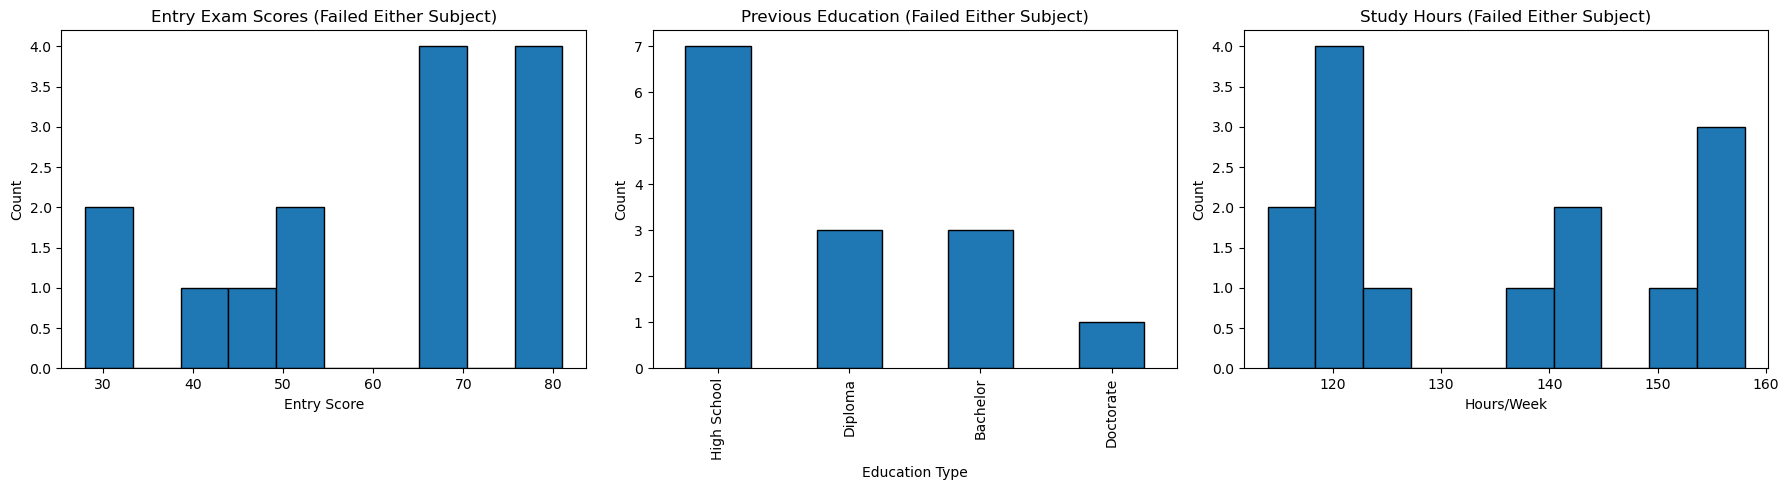

In [20]:
low_either = df[(df['Python'] < 50) | (df['DB'] < 50)]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram điểm đầu vào
axes[0].hist(low_either['entryEXAM'], bins=10, edgecolor='black')
axes[0].set_title("Entry Exam Scores (Failed Either Subject)")
axes[0].set_xlabel("Entry Score")
axes[0].set_ylabel("Count")

# Biểu đồ cột prevEducation
low_either['prevEducation'].value_counts().plot(
    kind='bar', ax=axes[1], edgecolor='black'
)
axes[1].set_title("Previous Education (Failed Either Subject)")
axes[1].set_xlabel("Education Type")
axes[1].set_ylabel("Count")

# Histogram studyHOURS
axes[2].hist(low_either['studyHOURS'], bins=10, edgecolor='black')
axes[2].set_title("Study Hours (Failed Either Subject)")
axes[2].set_xlabel("Hours/Week")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


### Analysis of Students Who Failed Either Subject

#### Key Findings
1. **Entry Exam Scores**  
   - Most underperforming students had low-to-moderate entry scores (30–60).  
   - However, some with relatively high entry scores (70–80) also failed.  
   - → Entry score alone does not guarantee academic success.  

2. **Previous Education**  
   - Many students with only *High School* background struggled, which is expected.  
   - Surprisingly, even students with *Diploma*, *Bachelors*, or *Doctorate* degrees failed.  
   - → Previous education level does not ensure good performance, especially if their background is in non-technical fields.  

3. **Study Hours**  
   - Some students studied extensively (>140 hours) yet still failed.  
   - → High study time ≠ effective learning. This suggests inefficiency in study methods or lack of practice-oriented learning.  

---


#### Recommendations
1. **For students with low entry scores**  
   - Introduce *foundation/review courses* to build up basic Python/DB knowledge.  
   - Provide early mentoring or tutoring sessions.  

2. **For students with high entry scores but poor performance**  
   - Focus on *learning strategies*: encourage project-based learning and regular practice.  
   - Provide guidance on motivation and time management.  

3. **For students with high study hours but low scores**  
   - Promote *smart learning*: daily coding exercises, frequent feedback, and peer learning groups.  

4. **For students with advanced degrees but low scores**  
   - Offer *bridge courses* tailored for those from non-technical backgrounds.  
   - Organize workshops focusing on applied problem-solving in IT.  


#### Overall Insight
Entry scores, previous education, and study hours are **not sufficient predictors** of success.  
The main issues likely stem from **study effectiveness, background mismatch, and learning strategies**.  

➡️ **Institutional Recommendations**:  
- Implement an **early warning system** to detect struggling students mid-term.  
- Develop **personalized learning plans** based on student background and progress.  
